In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
binDef = "_FineCoarse"
detUnfold_muon_2016 = an.ISRAnalysis("2016", "muon", False, "matrix", \
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 40
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [3]:
detUnfold_electron_2016 = an.ISRAnalysis("2016", "electron", False, "matrix", \
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 50
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [4]:
sigma = detUnfold_muon_2016.checkMatrixCond()

Decompose(), successed? 1
Mass, Cond(): 3.58361

In [5]:
#sigma.Print()

In [6]:
detUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x5d72278>

Decompose(), successed? 1
Pt, Cond(): 6.63329

In [7]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [8]:
#systematics = {"ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
#              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}
#              #"Fake":["FakeUp", "FakeDown"]}
    
systematics = {"ID":["IdSFUp", "IdSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleAUp"], "AlphaS":["AlphaSUp", "AlphaSDown"],\
              #"LepMom":["LepMomScaleUp","LepMomScaleDown"]}
              "LepMom": ["NoLepMomCorr", "Nominal"]} #then skip the second, and use the nominal result

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        detUnfold_muon_2016.setSystematics(sysName, postfix)

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        print(sysName + " " + postfix)
        detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix)

        detUnfold_muon_2016.subFake(True, sysName,postfix)

ID IdSFUp
ID IdSFDown
TRG trgSFUp
TRG trgSFDown
PU PUUp
PU PUDown
Scale ScaleABUp
Scale ScaleABDown
Scale ScaleAUp
Scale ScaleAUp
AlphaS AlphaSUp
AlphaS AlphaSDown
LepMom NoLepMomCorr
LepMom Nominal
Detector_NoLepMomCorr/Pt_FineCoarse/histo_WJets_MG
Detector_NoLepMomCorr/Pt_FineCoarse/histo_WW_pythia
Detector_NoLepMomCorr/Pt_FineCoarse/histo_WZ_pythia
Detector_NoLepMomCorr/Pt_FineCoarse/histo_ZZ_pythia
Detector_NoLepMomCorr/Pt_FineCoarse/histo_DYJets10to50ToTauTau
Detector_NoLepMomCorr/Pt_FineCoarse/histo_DYJetsToTauTau
Detector_NoLepMomCorr/Pt_FineCoarse/histo_TTLL_powheg
detector_level_DY_Fake_NoLepMomCorr/Pt_FineCoarse/histo_DYJets
detector_level_DY_Fake_NoLepMomCorr/Pt_FineCoarse/histo_DYJets10to50
Detector/Pt_FineCoarse/histo_WJets_MG
Detector/Pt_FineCoarse/histo_WW_pythia
Detector/Pt_FineCoarse/histo_WZ_pythia
Detector/Pt_FineCoarse/histo_ZZ_pythia
Detector/Pt_FineCoarse/histo_DYJets10to50ToTauTau
Detector/Pt_FineCoarse/histo_DYJetsToTauTau
Detector/Pt_FineCoarse/histo_TTLL_powhe

Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding 

In [9]:
#detUnfold_electron_2016.setFromPrevUnfold(detUnfold_muon_2016.getISRUnfold())

In [10]:
detUnfold_muon_2016.doUnfold()
detUnfold_muon_2016.doUnfold(True)

Do systematic unfold!
Unfold for AlphaS systematic.
2 systematic variation exist.
posfix: AlphaSUp
posfix: AlphaSDown
Unfold for ID systematic.
2 systematic variation exist.
posfix: IdSFUp
posfix: IdSFDown
Unfold for LepMom systematic.
2 systematic variation exist.
posfix: NoLepMomCorr
posfix: Nominal
Unfold for PU systematic.
2 systematic variation exist.
posfix: PUUp
posfix: PUDown
Unfold for Scale systematic.
4 systematic variation exist.
posfix: ScaleABUp
posfix: ScaleABDown
posfix: ScaleAUp
posfix: ScaleAUp
Unfold for TRG systematic.
2 systematic variation exist.
posfix: trgSFUp
posfix: trgSFDown


Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: 

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHis

Info in <TCanvas::Print>: png file DiPt_M0Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M1Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M2Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M3Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M4Pt_FineCoarseID.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M0Pt_FineCoarseTRG.png has been created
Warning in <TCanvas::Constructor>: Deleting c

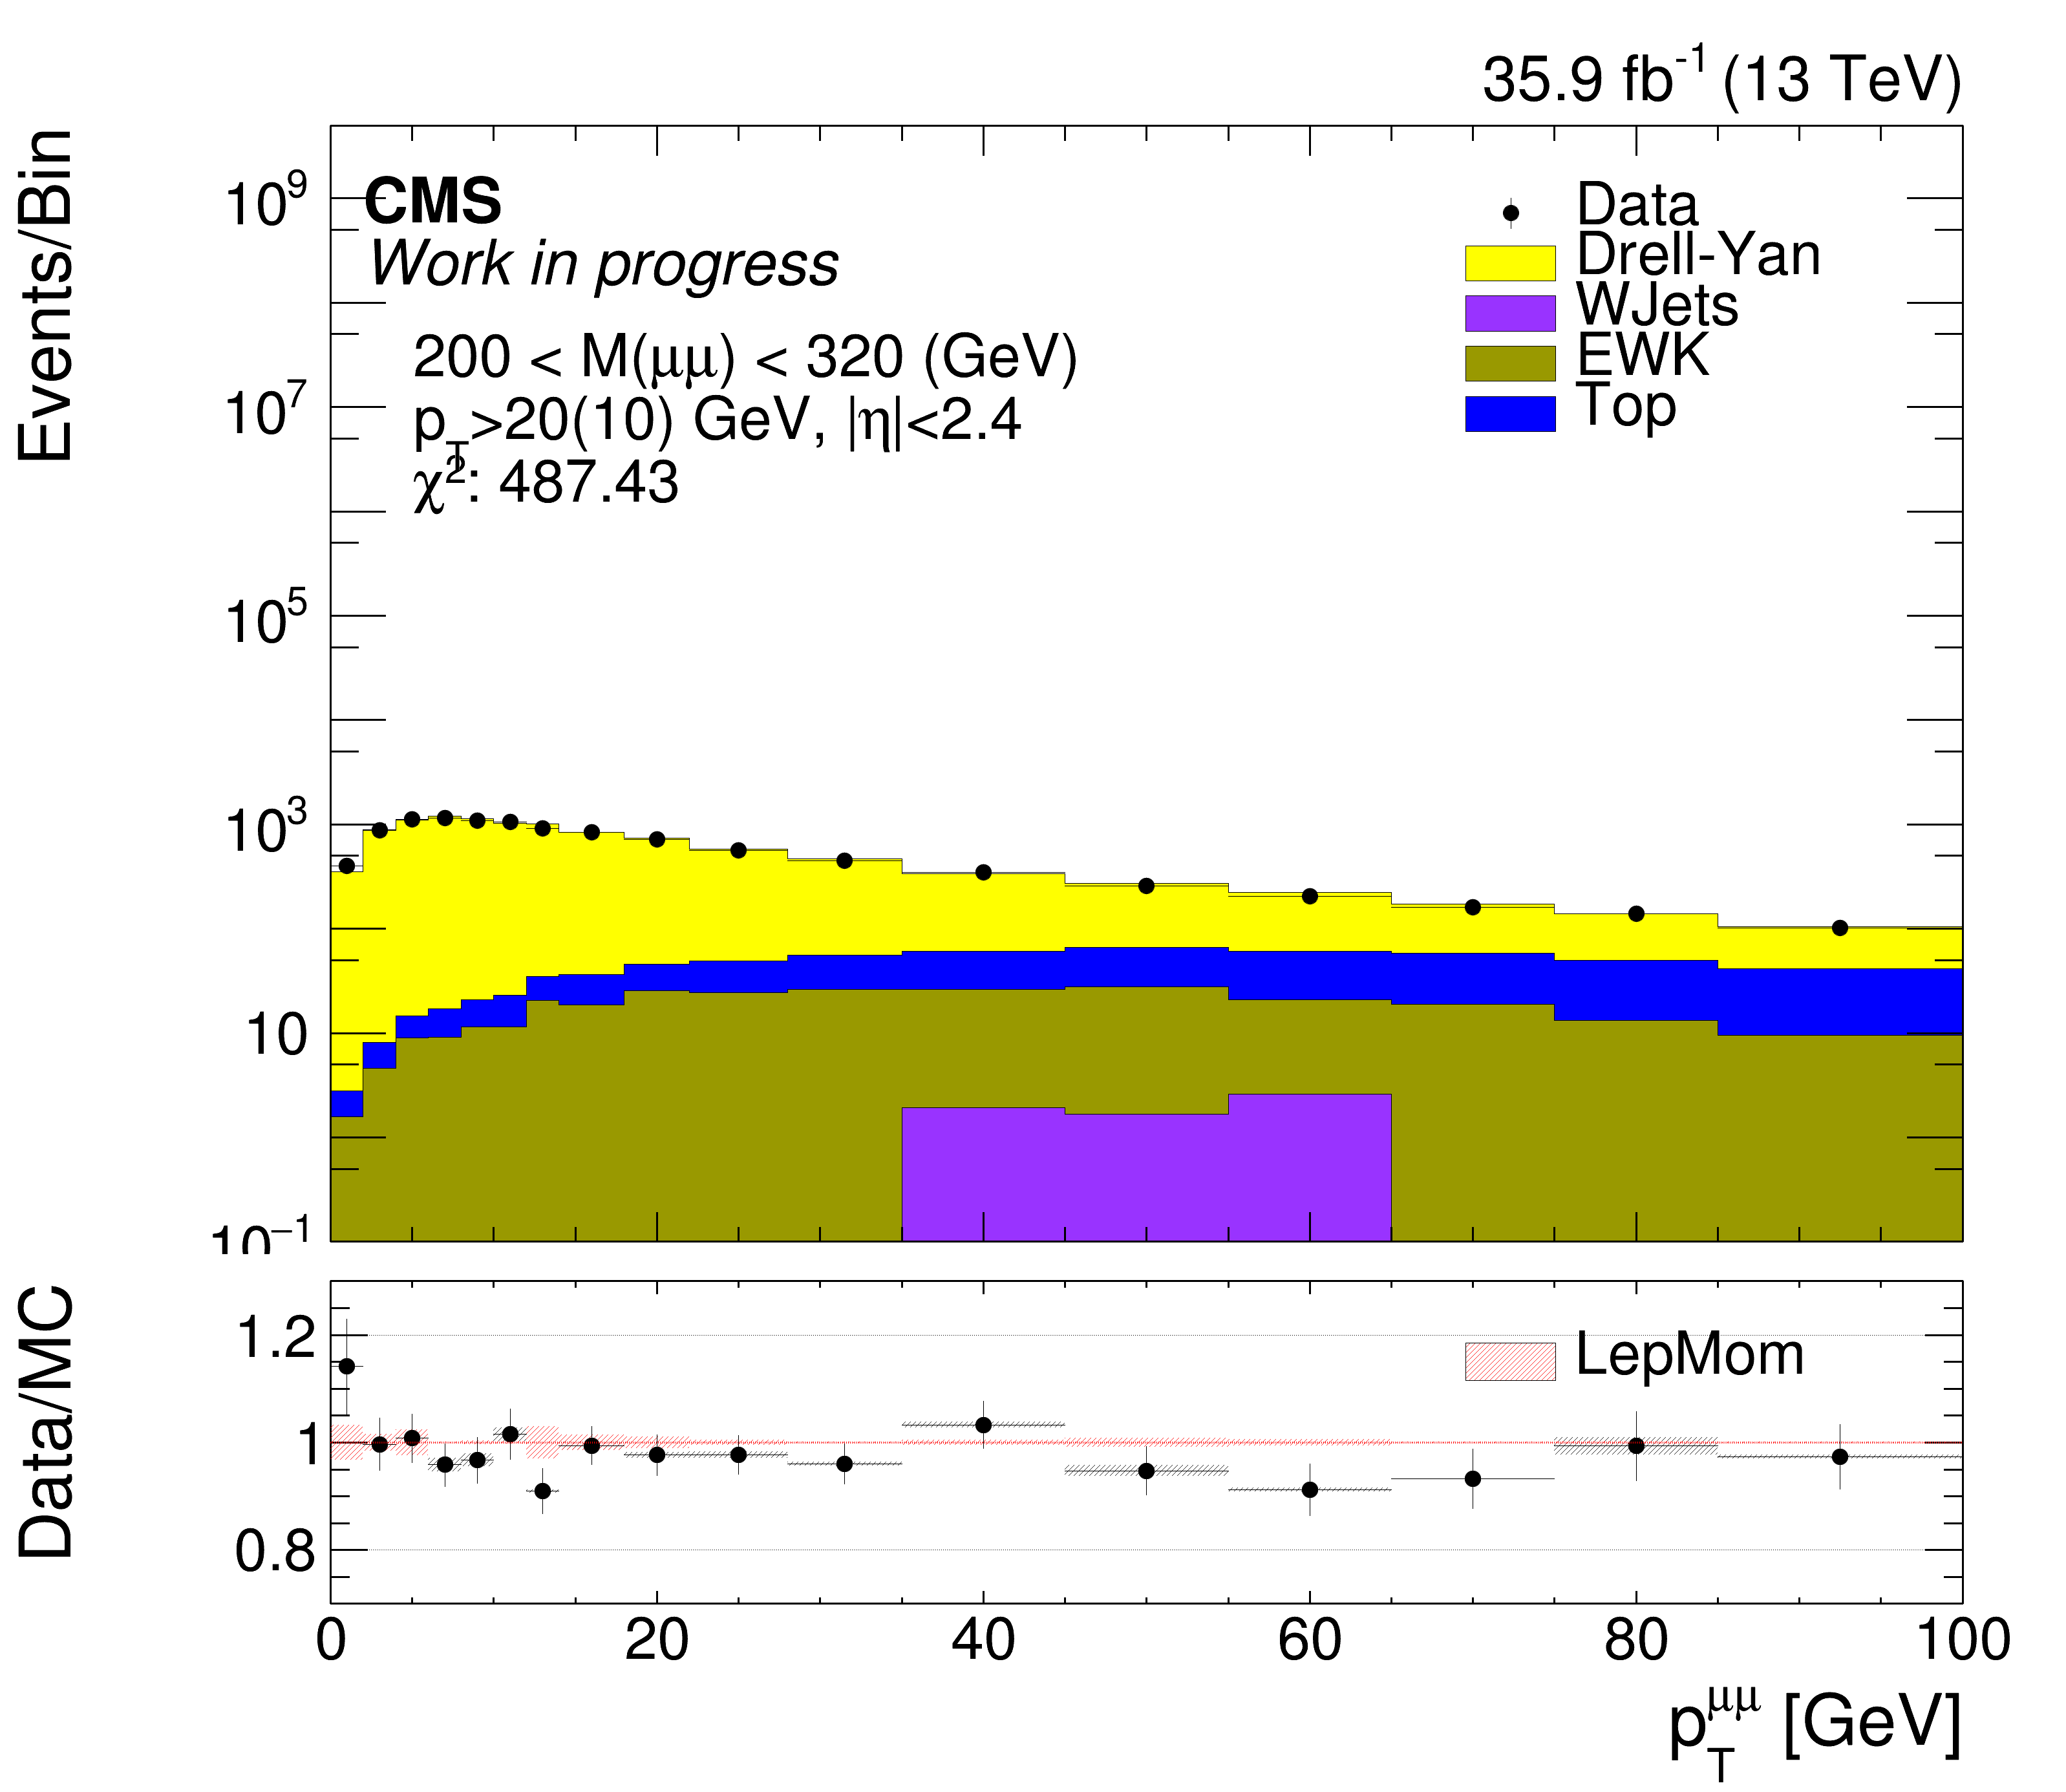

In [11]:
# 
for sysName, _ in systematics.items():
    for massBin in range(5):
        detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "DiPt_M"+str(massBin), massBin, True)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file detector_Mass_FineCoarseLepMom.png has been created


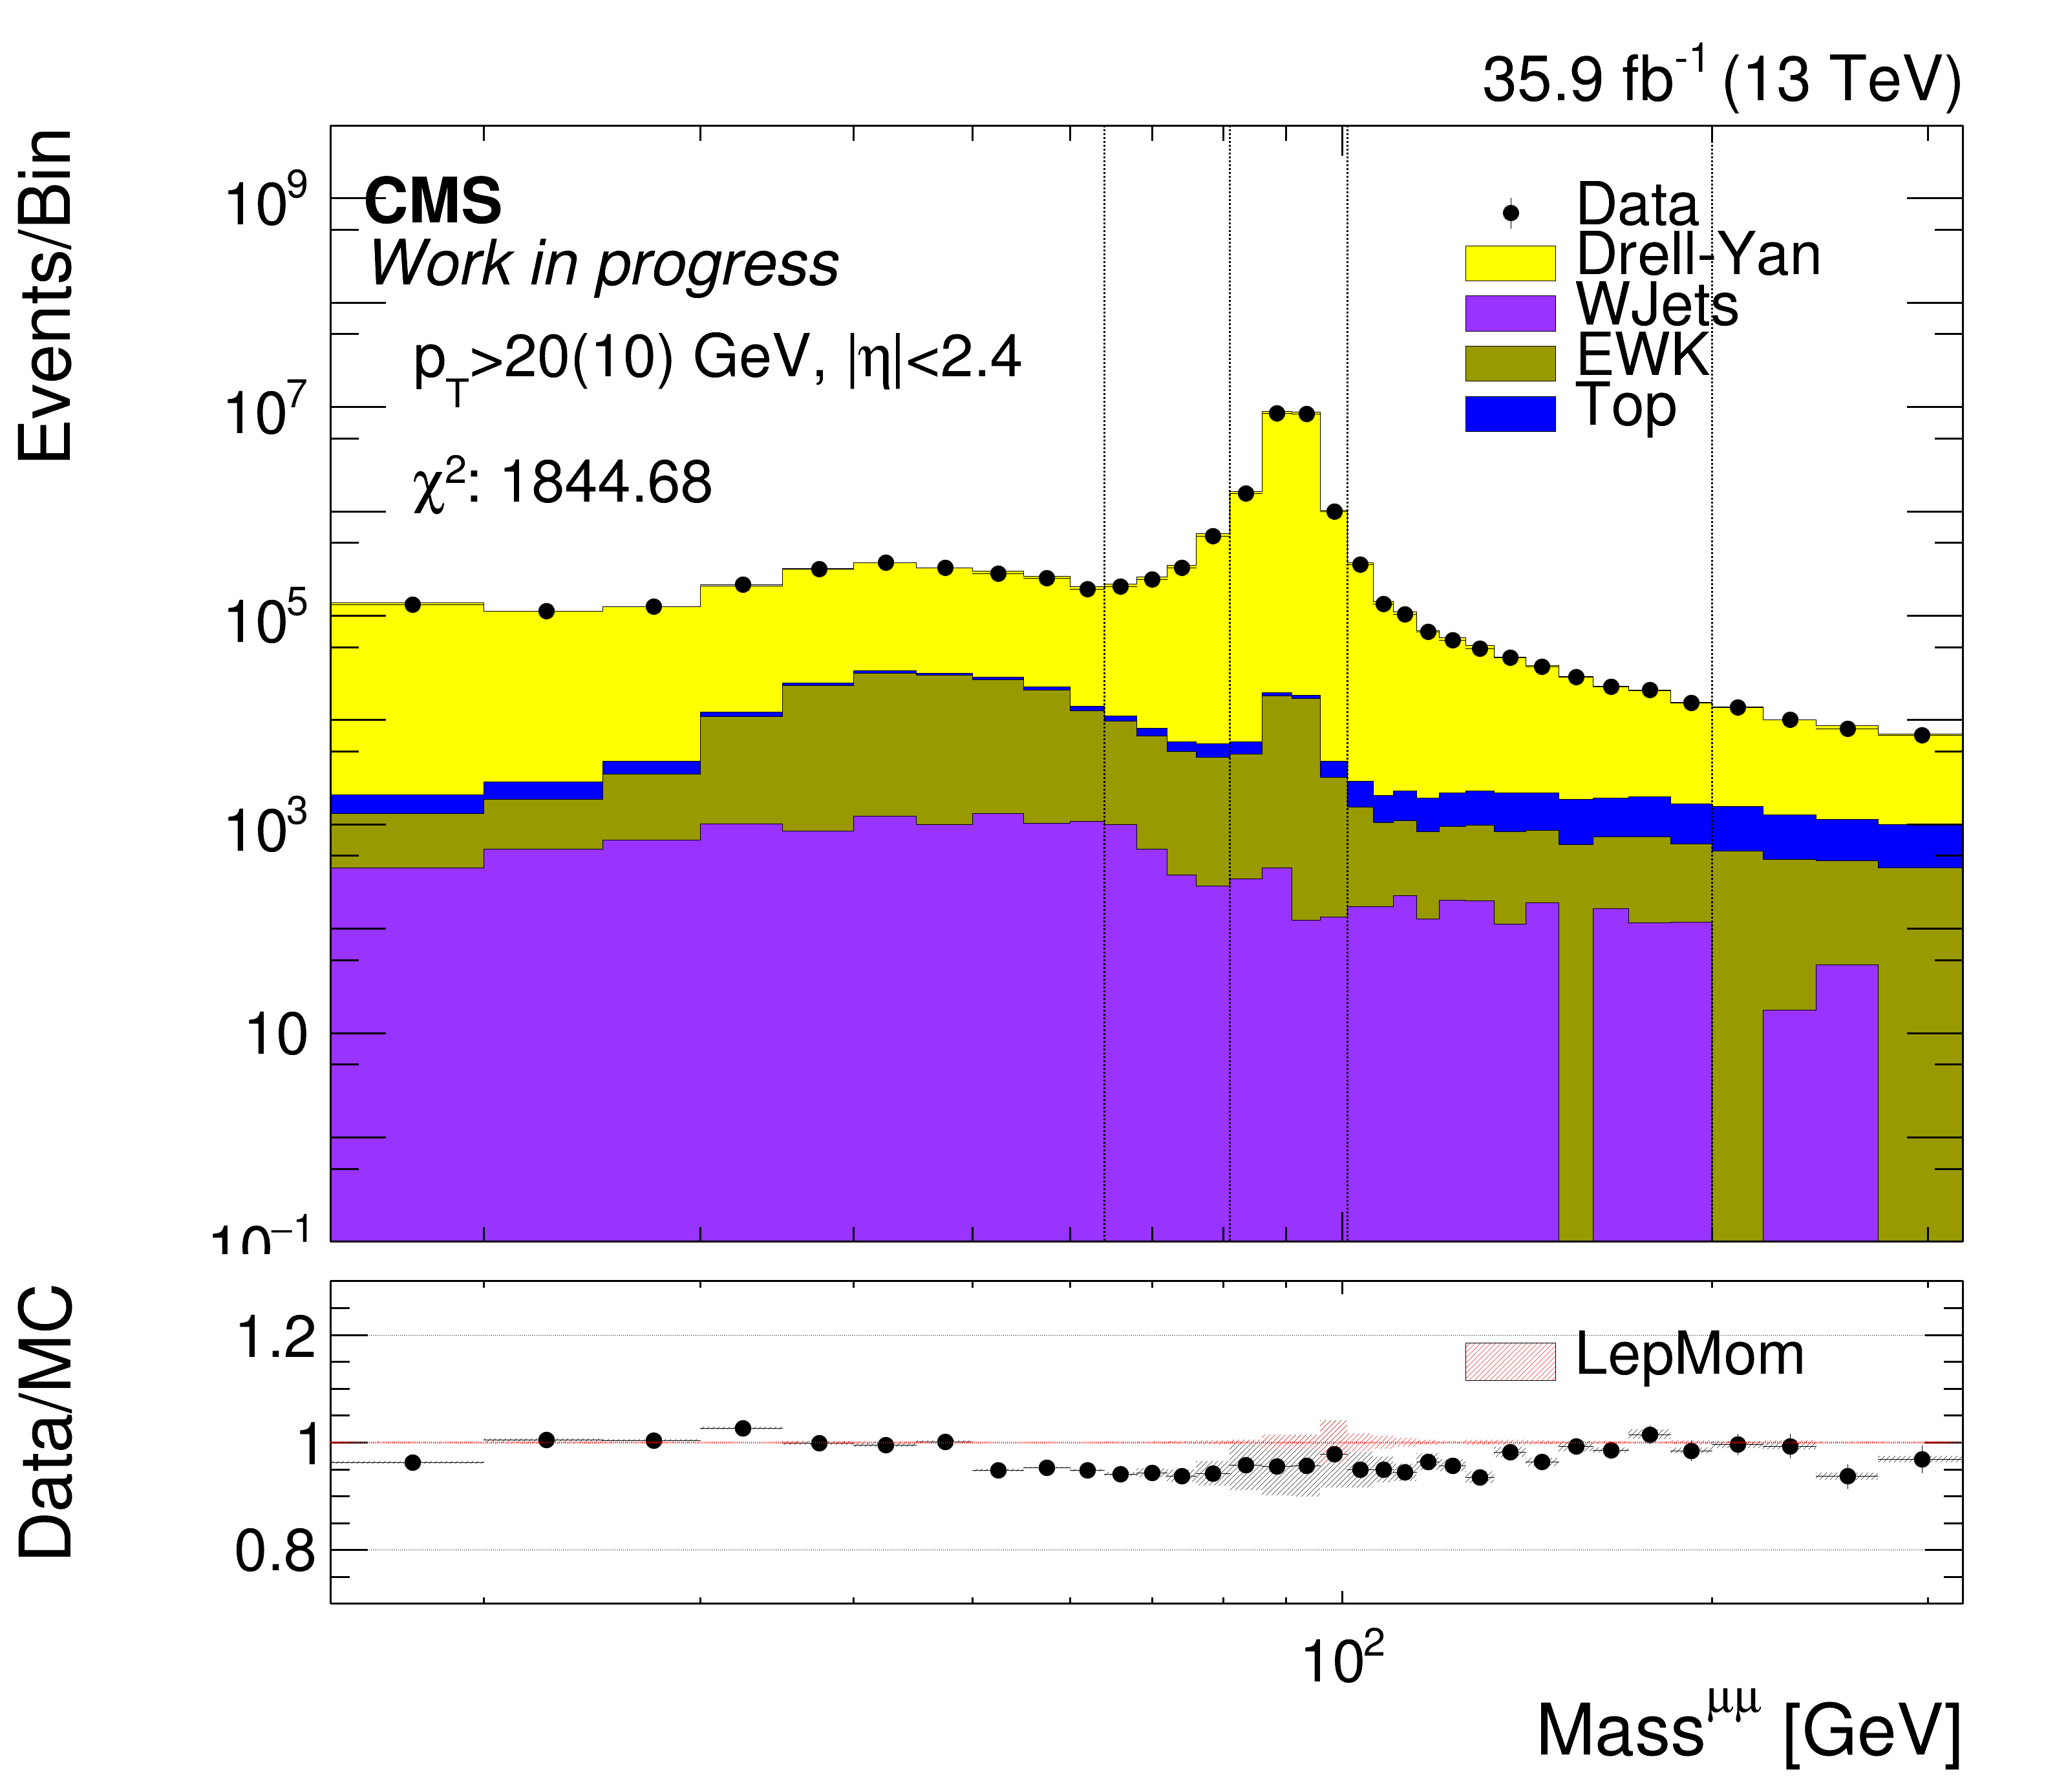

In [12]:
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "LepMom")

In [13]:
#for massBin in range(0,5):
#    detUnfold_muon_2016.drawDetPlot("Pt_1D", "Detector_M_"+str(massBin), "", True, "AlphaS", "DiPt_M"+str(massBin)+"1GeVBin", massBin)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 1449.14


Info in <TCanvas::Print>: png file unfolded_Mass.png has been created


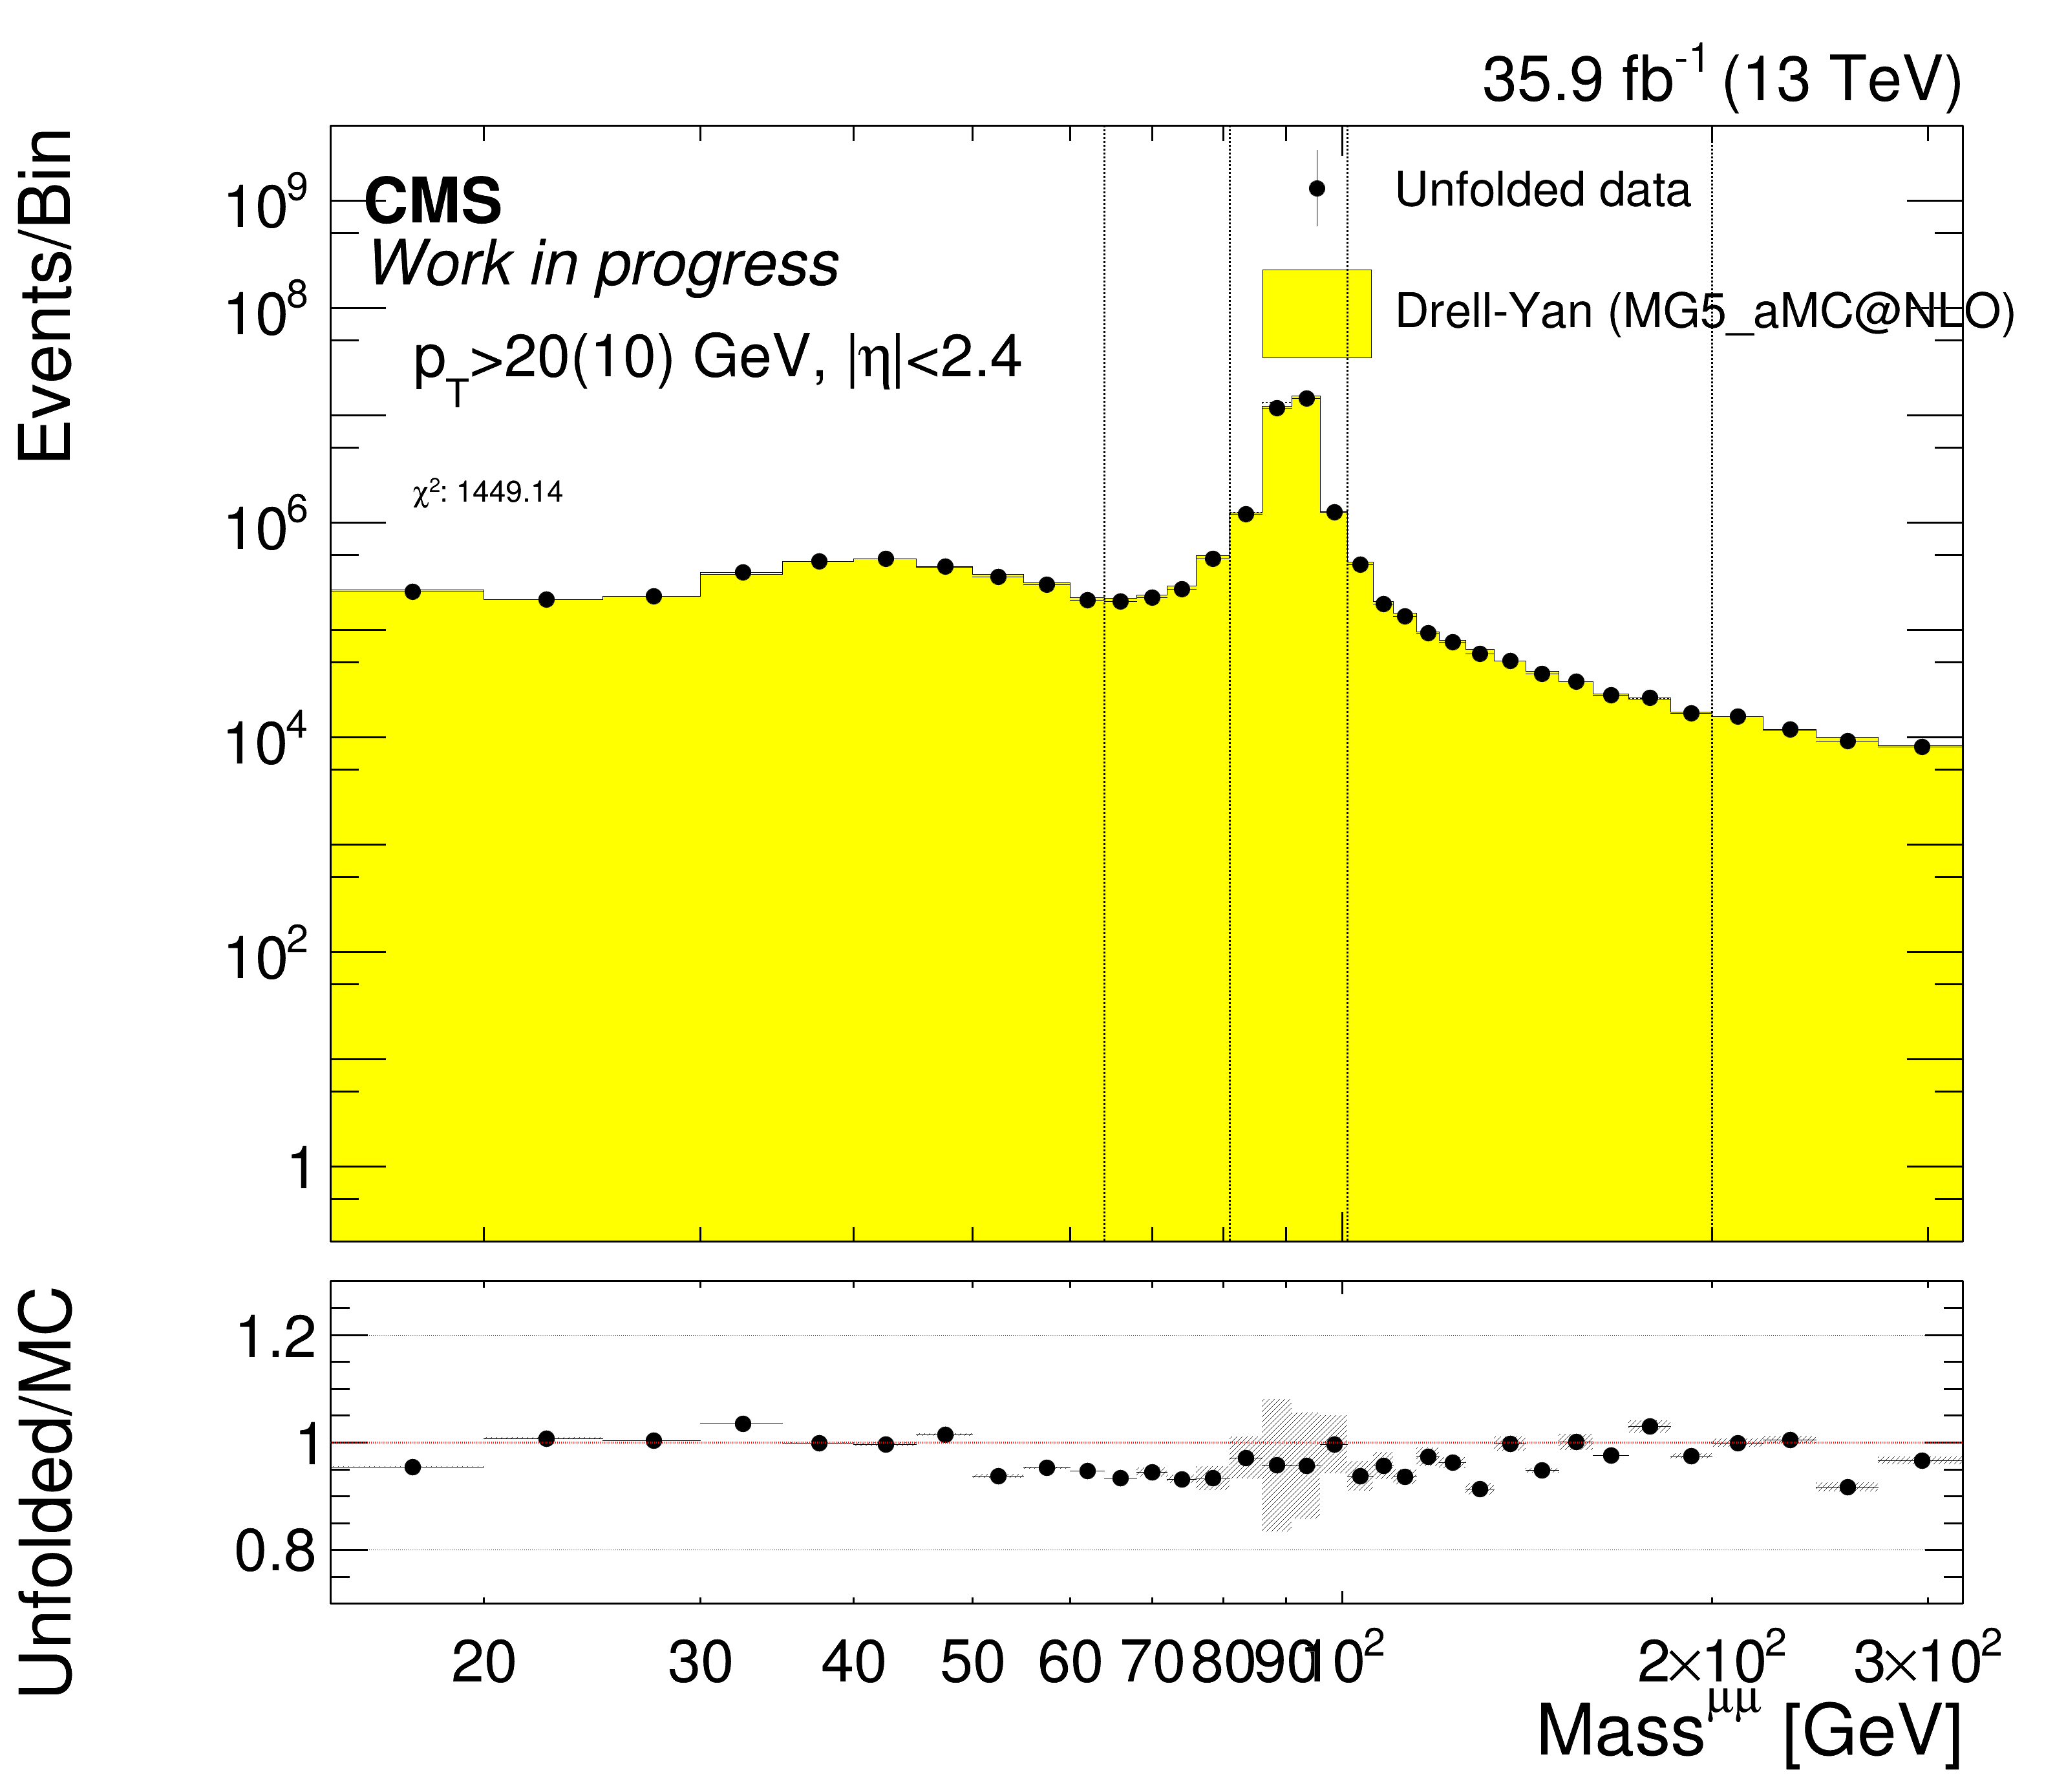

In [14]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "LepMom")

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 39.3748
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 652.403
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 975.562
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 576.238
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 508.742


Info in <TCanvas::Print>: png file UnfDiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M4.png has been created


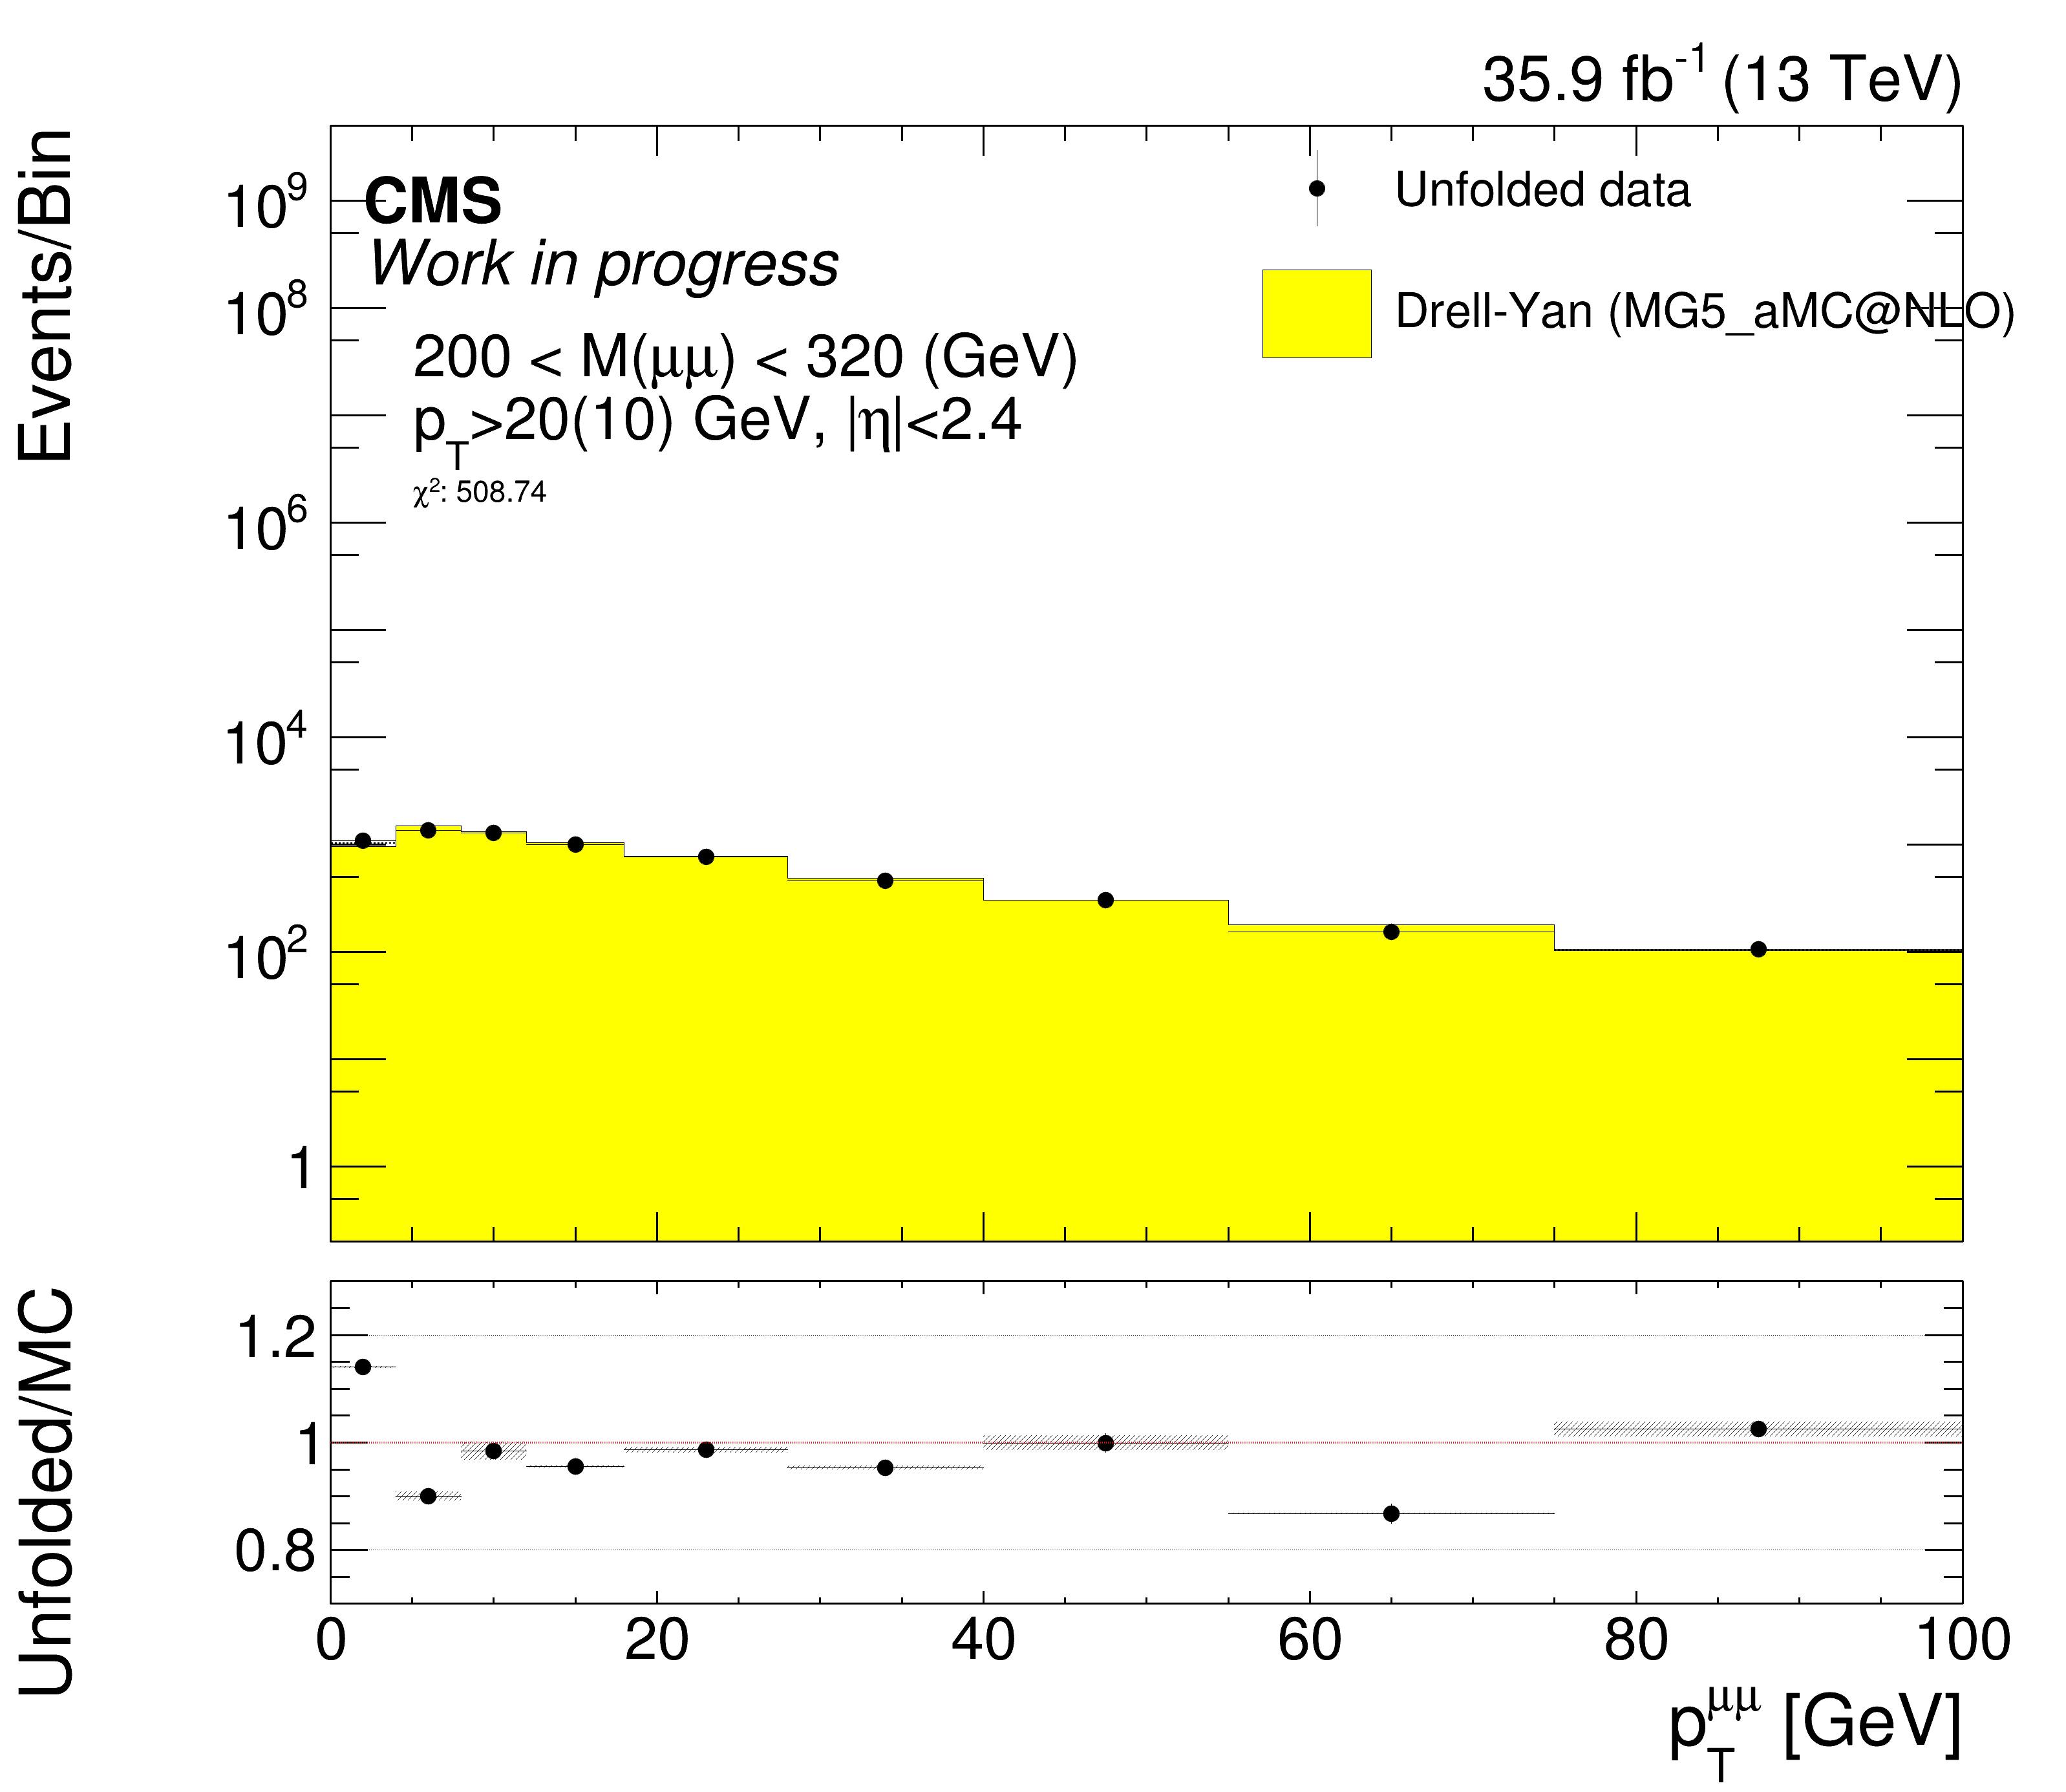

In [15]:
for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "LepMom", "UnfDiPt_M"+str(massBin), massBin, True)

In [16]:
detUnfold_muon_2016.setMeanValues()

ISRUnfold::setMeanMass()   Save mean of dilepton...
ISRUnfold::setMeanPt()   Save mean of dilepton momentum...


In [17]:
detUnfold_muon_2016.setSysMeanValues()

ISRUnfold::setSysMeanMass()   Save mean of dilepton...
Unfold for AlphaS systematic.
2 systematic variation exist.
AlphaS AlphaSUp 50.3714
AlphaS AlphaSUp 73.8236
AlphaS AlphaSUp 91.2559
AlphaS AlphaSUp 117.823
AlphaS AlphaSUp 241.187
AlphaS AlphaSDown 50.3691
AlphaS AlphaSDown 73.8206
AlphaS AlphaSDown 91.2556
AlphaS AlphaSDown 117.83
AlphaS AlphaSDown 241.198
Unfold for ID systematic.
2 systematic variation exist.
ID IdSFUp 50.3754
ID IdSFUp 73.8298
ID IdSFUp 91.2561
ID IdSFUp 117.779
ID IdSFUp 241.174
ID IdSFDown 50.3605
ID IdSFDown 73.8204
ID IdSFDown 91.2557
ID IdSFDown 117.857
ID IdSFDown 241.195
Unfold for LepMom systematic.
2 systematic variation exist.
LepMom NoLepMomCorr 50.3748
LepMom NoLepMomCorr 73.8678
LepMom NoLepMomCorr 90.9635
LepMom NoLepMomCorr 117.96
LepMom NoLepMomCorr 241.185
LepMom Nominal 50.368
LepMom Nominal 73.8251
LepMom Nominal 91.2559
LepMom Nominal 117.818
LepMom Nominal 241.184
Unfold for PU systematic.
2 systematic variation exist.
PU PUUp 50.373
PU PUU

In [18]:
detUnfold_muon_2016.setSysError()

Systematic: AlphaS 0 mass bin 
mass: 0.00338627 pt: 0.041322
Systematic: AlphaS 1 mass bin 
mass: 0.00447744 pt: 0.0314844
Systematic: AlphaS 2 mass bin 
mass: 0.000257241 pt: 0.00233682
Systematic: AlphaS 3 mass bin 
mass: 0.0118341 pt: 0.0304874
Systematic: AlphaS 4 mass bin 
mass: 0.0142298 pt: 0.103654
Systematic: ID 0 mass bin 
mass: 0.00746516 pt: 0.024233
Systematic: ID 1 mass bin 
mass: 0.00468925 pt: 0.0315684
Systematic: ID 2 mass bin 
mass: 0.000198588 pt: 0.0284253
Systematic: ID 3 mass bin 
mass: 0.0392088 pt: 0.0593573
Systematic: ID 4 mass bin 
mass: 0.0106785 pt: 0.0692763
Systematic: LepMom 0 mass bin 
mass: 0.00683956 pt: 0.0123405
Systematic: LepMom 1 mass bin 
mass: 0.0426613 pt: 0.015852
Systematic: LepMom 2 mass bin 
mass: 0.292388 pt: 0.0287564
Systematic: LepMom 3 mass bin 
mass: 0.142106 pt: 0.0432653
Systematic: LepMom 4 mass bin 
mass: 0.000896316 pt: 0.0281264
Systematic: PU 0 mass bin 
mass: 0.00496212 pt: 0.0176439
Systematic: PU 1 mass bin 
mass: 0.004857

In [19]:
detUnfold_muon_2016.setTotSysError()

In [20]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf")
gr_2016_muon_det_unfold_sys =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf",True,True)

In [21]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False)

20.1 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file Run2_detector.png has been created


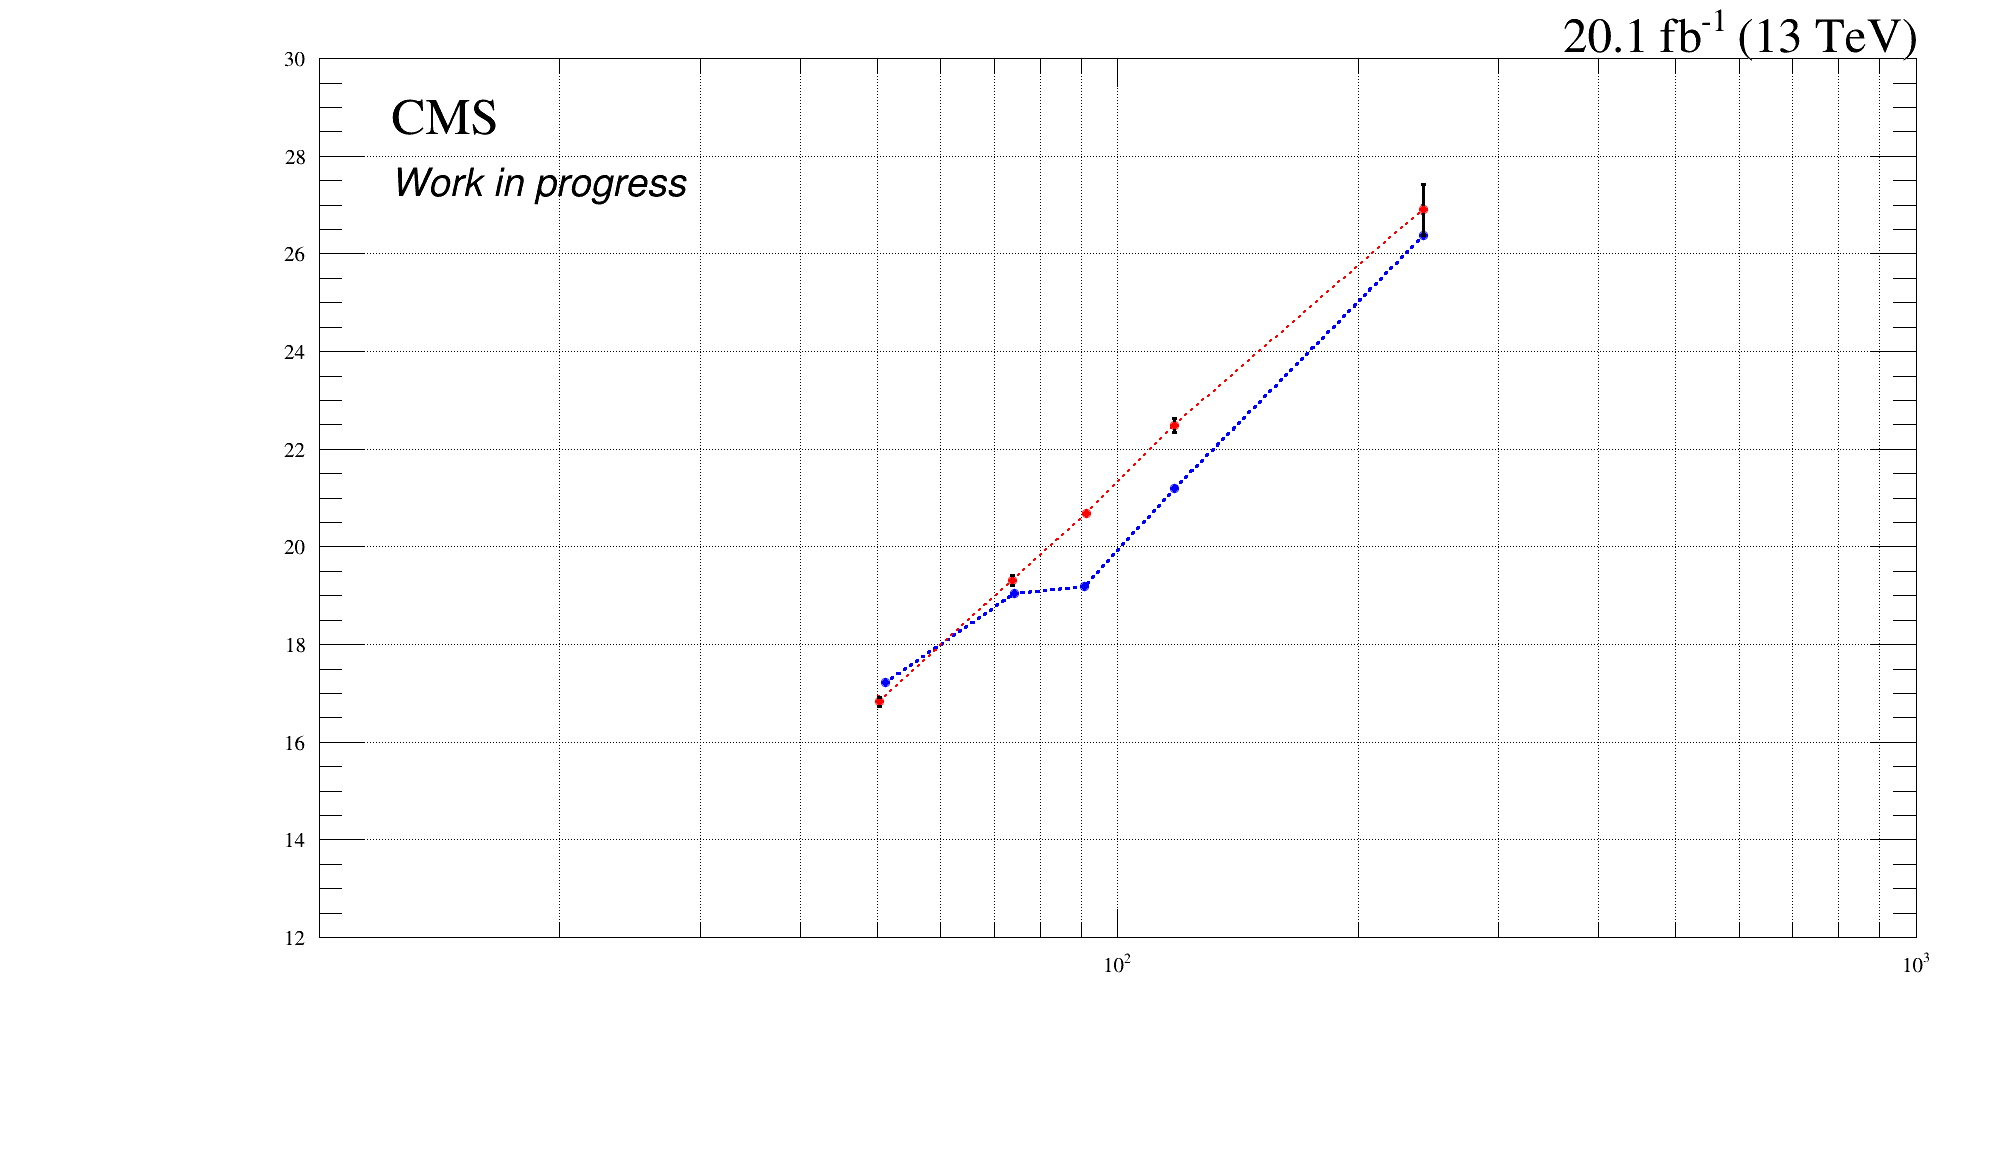

In [22]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 1.2

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 2000, 1200)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APL")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(10., 1000.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(2)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(rt.kBlue)
gr_2016_muon_det.SetLineColor(rt.kBlue)

gr_2016_muon_det_unfold.Draw("PL SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(rt.kRed)
gr_2016_muon_det_unfold.SetLineStyle(2)
gr_2016_muon_det_unfold.SetLineColor(rt.kRed)

gr_2016_muon_det_unfold_sys.Draw("E SAME")
gr_2016_muon_det_unfold_sys.SetLineWidth(3)
gr_2016_muon_det_unfold_sys.SetMarkerColor(rt.kBlack)
gr_2016_muon_det_unfold_sys.SetLineColor(rt.kBlack)

CMS_lumi.extraText = "Work in progress"
CMS_lumi.CMS_lumi(c_PtVsMass_detector, 4, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("Run2_detector.png")